obiettivo: classificare una specie dall'altra

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("./marziani.csv")
print(f"""
{data.head()} 

{data.columns}

{data.dtypes}
""")
#head: panoramica generale
#columns: nome colonne
#dtypes: tipo delle feature


  specie colore  n_arti  peso  altezza  larghezza
0  Robby  viola    20.0  3.87    14.77      73.22
1  Robby  viola    27.0  3.15    28.19      88.44
2  Robby  viola    25.0  4.35    12.05      76.74
3  Robby    blu    20.0  3.76     9.90      81.37
4  Robby    blu    28.0  2.86    19.87      84.65 

Index(['specie', 'colore', 'n_arti', 'peso', 'altezza', 'larghezza'], dtype='object')

specie        object
colore        object
n_arti       float64
peso         float64
altezza      float64
larghezza    float64
dtype: object



prima bisogna eliminare i valoti nulli. Non possiamo dare all'algoritmo dati sporchi perchè il nostro algoritmo potrebbe essere allenato

In [11]:
for specie in data.specie.unique(): #data.specie è uno shortcat, usato se il nome colonna non ha spazi
    print(">>", specie)
    for f in data.columns[1:]:
        dati=data[data.specie==specie]
        print(dati[f].describe())

>> Robby
count     995
unique      3
top       blu
freq      340
Name: colore, dtype: object
count    999.000000
mean      24.637638
std        2.899248
min       20.000000
25%       22.000000
50%       25.000000
75%       27.000000
max       29.000000
Name: n_arti, dtype: float64
count    1000.000000
mean        3.500900
std         0.489139
min         2.130000
25%         3.170000
50%         3.490000
75%         3.830000
max         5.050000
Name: peso, dtype: float64
count    996.000000
mean      17.518082
std        4.227621
min        3.170000
25%       14.740000
50%       17.330000
75%       20.307500
max       29.400000
Name: altezza, dtype: float64
count    999.000000
mean      84.719429
std       11.456814
min       44.700000
25%       77.045000
50%       84.890000
75%       92.510000
max      117.450000
Name: larghezza, dtype: float64
>> Simmy
count       998
unique        3
top       rosso
freq        339
Name: colore, dtype: object
count    995.000000
mean      24.544724


usaimo i grafici per trovare delle feature utili per distinguere una specie dall'altra. 
Correlazione relazione di causalità tra due variabili: più studio più il rendimento di sarà alto

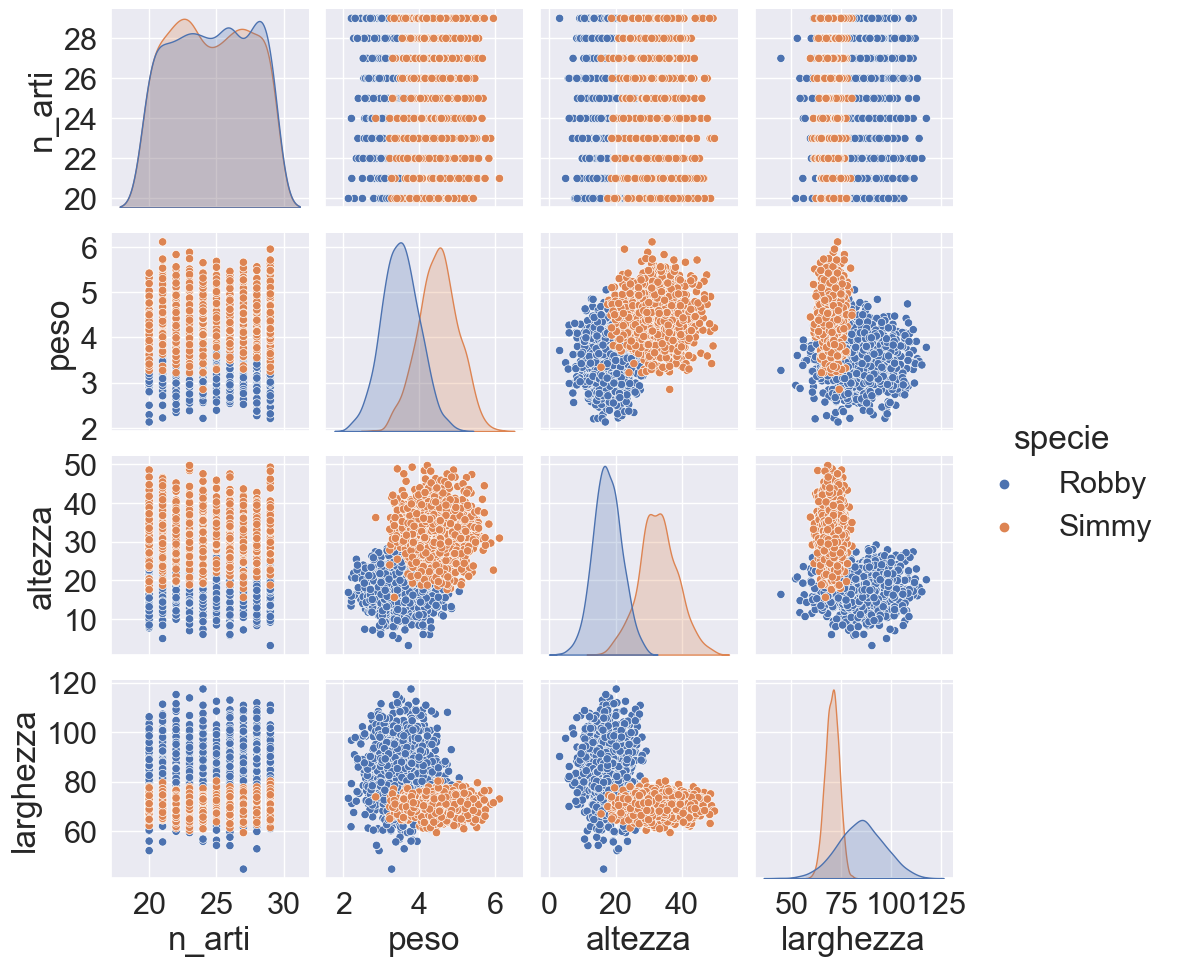

In [12]:
import seaborn as sns#si basa su matplotlib
#analisi grafica
sns.set_theme(font_scale=2)
sns.pairplot(data, hue="specie", dropna=True)
sns.set()

In [26]:
def analisi_grafica(data_frame, target_name, lista_variabili_quantitative):
    '''
        la funzione analisi_grafica crea un'analisi grafica delle colonne quantitative di un dataframe:

        crea n*n grafici dove n è uguale alla lunghezza di "lista_variabili_quantitative". I grafici che genera sono:
        - istogrammi quando si tratta  della stessa variabile
        - grafici a dispersione quando si tratta di variabili diverse

        INPUT:
        -data_frame: data frame letto con pandas
        -target_name: nome della colonna dataframe su cui effetturare il riconoscimeto
        -lista_variabili_quantitative: lista contente i nomi delle colonne quantitative del dataframe
        
        RETURN:
        -analisi grafica del dataframe: figura contenente grafici a 
        dispersione e istogrammi delle varibili quantitative con colori 
        diversi in base al valore del target
        
        '''
    
    unique_target_values=data_frame[target_name].unique()
    target_values_color={}
    nrows, ncols=len(lista_variabili_quantitative), len(lista_variabili_quantitative)
    for value in unique_target_values:
        target_values_color[value]=np.random.uniform(0, 1,3)
    fig, axs=plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows*nrows, ncols*ncols))
    for i in range(nrows):
        for j in range(ncols):
            if i==j:
                for value in unique_target_values:
                    axs[i, j].hist(data_frame[data_frame[target_name]==value][lista_variabili_quantitative[i]].values, color=target_values_color[value],  label=value, alpha=0.5)


                    axs[i, j].set_xlabel(lista_variabili_quantitative[i])
                    axs[i, j].set_ylabel("Frequenza")
                    axs[i, j].legend()


            else:
                for value in unique_target_values:
                    axs[i, j].scatter(data_frame[data_frame[target_name]==value][lista_variabili_quantitative[i]].values, data_frame[data_frame[target_name]==value][lista_variabili_quantitative[j]].values,   color=target_values_color[value],  alpha=0.5, label=value)


                axs[i, j].set_xlabel(lista_variabili_quantitative[i])
                axs[i, j].set_ylabel(lista_variabili_quantitative[j])
                axs[i, j].legend()

            
                

                
    
    plt.show()
        
        

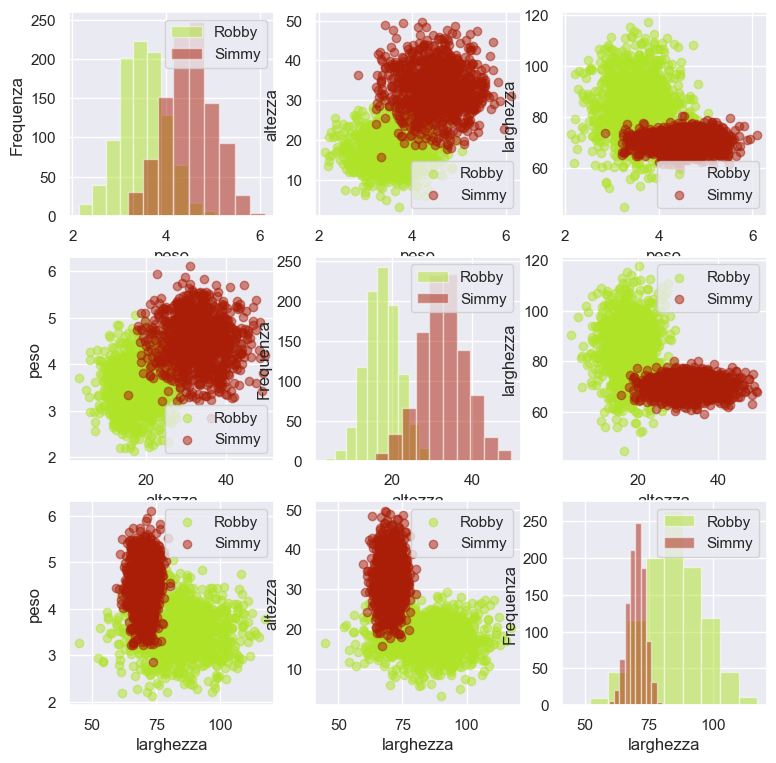

In [41]:
selected_cols=["peso", "altezza", "larghezza"]#colonne di interesse

analisi_grafica(data, "specie", selected_cols)

pairpolt mette in relazione di una specie con l'altra
la diagonale ci dà info statistiche sulla distribuzione delle feature tra le due specie.
con questo grafico possiamo capire quali feature ci permettono di dostinguere le specie.
peso è una feature che ci permettedi distinguere le specie così come altezza e larghezza.
Quando abbbiamo feature qualitative dobbiamo mapparle con un valore numerico. Per far ciò ordiniamo l'array in ordine alfabetico e gli assegnamo valori tra 0 e 1 

### Pulizia Dati
prima di dare i dati, bisogna eliminare i valori nulli. due possibilità:
- eliminarli all'inizio
- eliminare i dati nulli solo delle colonne che ci servono, per perdere il minor numero di campione che ci servono

con n feature, per un algoritmo di ML dovremmo avere 10n sample

mappiamo le colonne con valori mancanti

In [15]:
cols_with_missing=[col for col in data.columns if data[col].isnull().sum()]
print(cols_with_missing)

['colore', 'n_arti', 'altezza', 'larghezza']


ci salva le colonne con dei dati mancanti

In [22]:
selected_cols=["peso", "altezza", "larghezza"]#colonne di interesse
d=data.dropna(axis="index", subset=selected_cols)
#controllo che le colonne che ci servono non abbiamo null
print(d.shape)
print([col for col in d.columns if d[col].isnull().sum()])

(1992, 6)
['colore', 'n_arti']


In [27]:
X=d[selected_cols]#matrice della feature
y=d["specie"]#target

print(f"""

{X.head()}


{y.head()}
""")



   peso  altezza  larghezza
0  3.87    14.77      73.22
1  3.15    28.19      88.44
2  4.35    12.05      76.74
3  3.76     9.90      81.37
4  2.86    19.87      84.65


0    Robby
1    Robby
2    Robby
3    Robby
4    Robby
Name: specie, dtype: object



una parte di dati sarà usata per l'addestramento, l'altra per l'allenamento.
set di train più alto del test

In [32]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_traun, y_test=train_test_split(X, y, train_size=0.7, random_state=0)
#train size è la percentuale di dati che passiamo al train=70%
#random_state ha un seed che ci rende il random pseudocadsuale

print(X_train.head())

      peso  altezza  larghezza
1853  4.58    29.13      70.59
486   3.93    25.37      95.30
846   3.95    27.27      73.86
376   3.01    21.95      74.95
580   3.17    12.02      76.47


normalizzazione: vmedio=0 dev=1. abbiamo la formula

In [45]:
X_train_std=((X_train-X_train.mean())/X_train.std())
print("X_train normalizzato: ", X_train_std.describe())

X_train normalizzato:                 peso       altezza     larghezza
count  1.394000e+03  1.394000e+03  1.394000e+03
mean   1.503659e-16 -9.174870e-17 -1.376231e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -2.536124e+00 -2.409953e+00 -2.296781e+00
25%   -7.419855e-01 -8.630136e-01 -7.241093e-01
50%   -7.377697e-03 -1.173433e-01 -3.595044e-01
75%    7.554843e-01  8.455417e-01  6.667149e-01
max    2.987562e+00  2.572085e+00  3.444039e+00


garbage in garbage out: se diamo spazzattura, otteniamo spazzatura. Lavorare sui dati dell'allenamento è importante e bisogna usare feature utili, eliminare i valori nulli e normalizzare